# Prediction of the star temperature

# Content

1. [Project Description](#section_1)
2. [Data import](#section_2)
3. [Data preparation and analysis](#section_3)
4. [Data Encoding](#section_4)
5. [Neural networks building](#section_5)
6. [Neural network tuning](#section_6)
7. [General Connclusion](#section_7)

<a name ='section_2'></a>
# Project Description

Astronomy company would like to define the temperature on the surface of the newly spotted stars. For that purpose it's required to predict the star temperature using machine learning and based on the previous data from the database of the stars.

Main tasks are:
- import and prepare data;
- perform the exploratory analysis;
- rescale the data, and split it on train and test samples;
- build neural networks;
- declare the function for training and prediction;
- plot the comparison chart of actual and predicted star temperature;
- perform the network tuning (using dropout, optimizers, quantity of layers, activation functions);
- compare the models and select the best;
- RMSE score on the best network shall be 4500 or lower.

<a name ='section_2'></a>
# Data import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
from sklearn.preprocessing import OneHotEncoder,StandardScaler , MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [10]:
df_stars = pd.read_csv('data_stars.csv', index_col = [0])

<a name ='section_'></a>
# Data preparation and analysis

In [11]:
# display 5 first rows
df_stars.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color
0,3068,0.002400,0.1700,16.12,0,red
1,3042,0.000500,0.1542,16.60,0,red
2,2600,0.000300,0.1020,18.70,0,red
3,2800,0.000200,0.1600,16.65,0,red
4,1939,0.000138,0.1030,20.06,0,red


In [13]:
# display info
df_stars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 228 entries, 0 to 239
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         228 non-null    int64  
 1   Luminosity(L/Lo)        228 non-null    float64
 2   Radius(R/Ro)            228 non-null    float64
 3   Absolute magnitude(Mv)  228 non-null    float64
 4   Star type               228 non-null    int64  
 5   Star color              228 non-null    object 
dtypes: float64(3), int64(2), object(1)
memory usage: 12.5+ KB


In [14]:
# display the data of numeric columns
df_stars.describe()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type
count,228.000000,228.000000,228.000000,228.000000,228.000000
mean,10680.692982,107654.047662,236.607302,4.345969,2.473684
std,9742.810427,176985.132549,515.015990,10.664949,1.736930
min,1939.000000,0.000110,0.008400,-11.920000,0.000000
25%,3336.000000,0.000878,0.107500,-6.241250,1.000000
50%,5776.000000,0.030500,0.672500,10.260000,2.000000
75%,16417.500000,198650.000000,45.250000,13.830000,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [15]:
# display the unique values of cuolumn star color
df_stars['Star color'].sort_values().unique()

array(['blue', 'blue white', 'red', 'white', 'white-yellow'], dtype=object)

In [16]:
# format unified
df_stars['Star color'] = df_stars['Star color'].str.lower()

In [17]:
# update of the similar colors name to one format
def str_replace(color):
    if color == 'blue ':
        return 'blue'
    elif color == 'blue white ' or color == 'blue-white':
        return 'blue white'
    elif color == 'yellow-white':
        return 'white-yellow'
    else:
        return color

In [18]:
# deletion of implicit colors
correct_color = []
for i in df_stars['Star color']:
    correct_color.append(str_replace(i))

In [19]:
df_stars['Star color'] = correct_color

Star color
red             112
blue             56
blue white       41
white            10
white-yellow      9
Name: Star type, dtype: int64


Text(0, 0.5, 'Quantity')

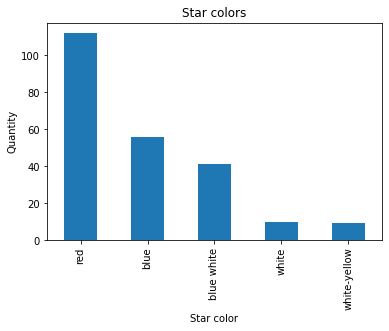

In [20]:
# plotting the color destribution 

print(df_stars.groupby('Star color')['Star type'].count().sort_values(ascending=False))
df_stars.groupby('Star color')['Star type'].count().sort_values(ascending=False).plot(kind = 'bar', title = 'Star colors')
plt.xlabel('Star color')
plt.ylabel('Quantity')

In [21]:
# selection of stars with quantity of color less than 5
star_colors = df_stars.groupby('Star color')['Star type'].count().sort_values(ascending=False).reset_index()
star_colors = star_colors.rename(columns={"Star type": "quantity"})
star_color_good = star_colors.query('quantity > 5')['Star color']

In [22]:
# Deletion of colors with quantity of stars less than 5

df_stars = df_stars.rename(columns={"Star color": "Star_color"})
df_stars = df_stars.query('Star_color in @star_color_good')
df_stars = df_stars.rename(columns={"Star_color": "Star color"})

Star color
red             112
blue             56
blue white       41
white            10
white-yellow      9
Name: Star type, dtype: int64


Text(0, 0.5, 'Quantity')

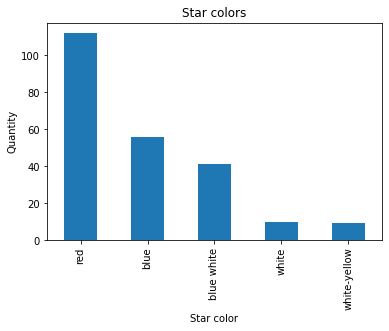

In [23]:
# display the color distribution table and plot it

print(df_stars.groupby('Star color')['Star type'].count().sort_values(ascending=False))
df_stars.groupby('Star color')['Star type'].count().sort_values(ascending=False).plot(kind = 'bar', title = 'Star colors')
plt.xlabel('Star color')
plt.ylabel('Quantity')

Text(0, 0.5, 'Quantity')

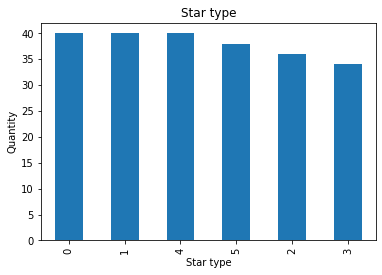

In [15]:
# plotting the star type distribution

df_stars.groupby('Star type')['Unnamed: 0'].count().sort_values(ascending=False).plot(kind = 'bar', title = 'Star type')
plt.xlabel('Star type')
plt.ylabel('Quantity')

([], [])

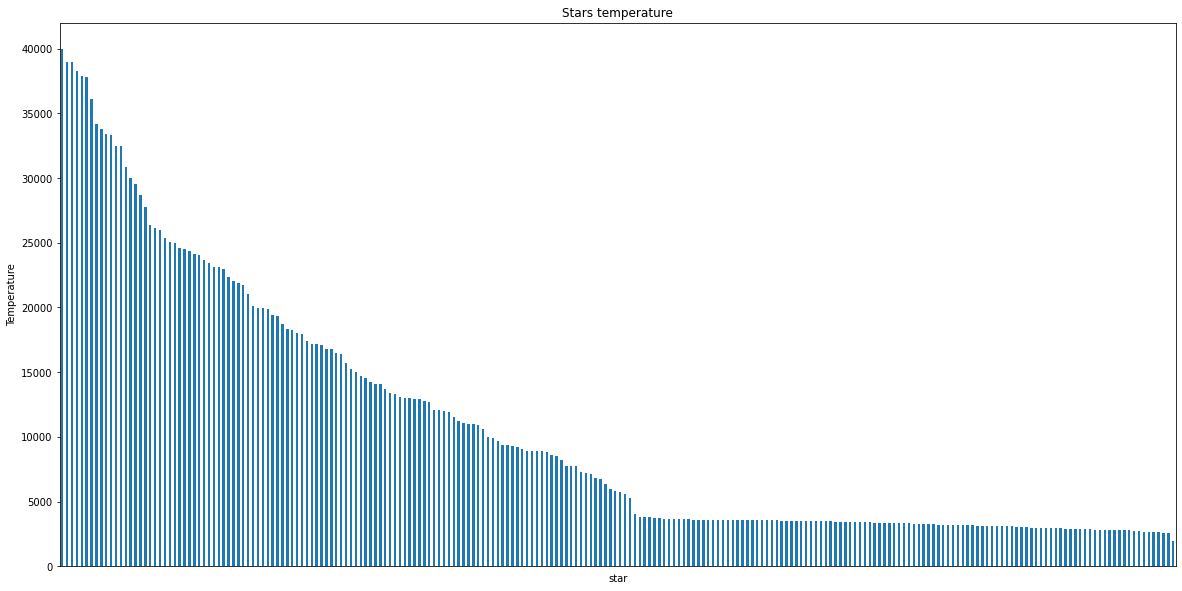

In [24]:
# plotting the stars temperature distribution

df_stars['Temperature (K)'].sort_values(ascending=False).plot(kind='bar',figsize = (20,10))
plt.xlabel('star')
plt.ylabel('Temperature')
plt.title('Stars temperature')
plt.xticks([])

([], [])

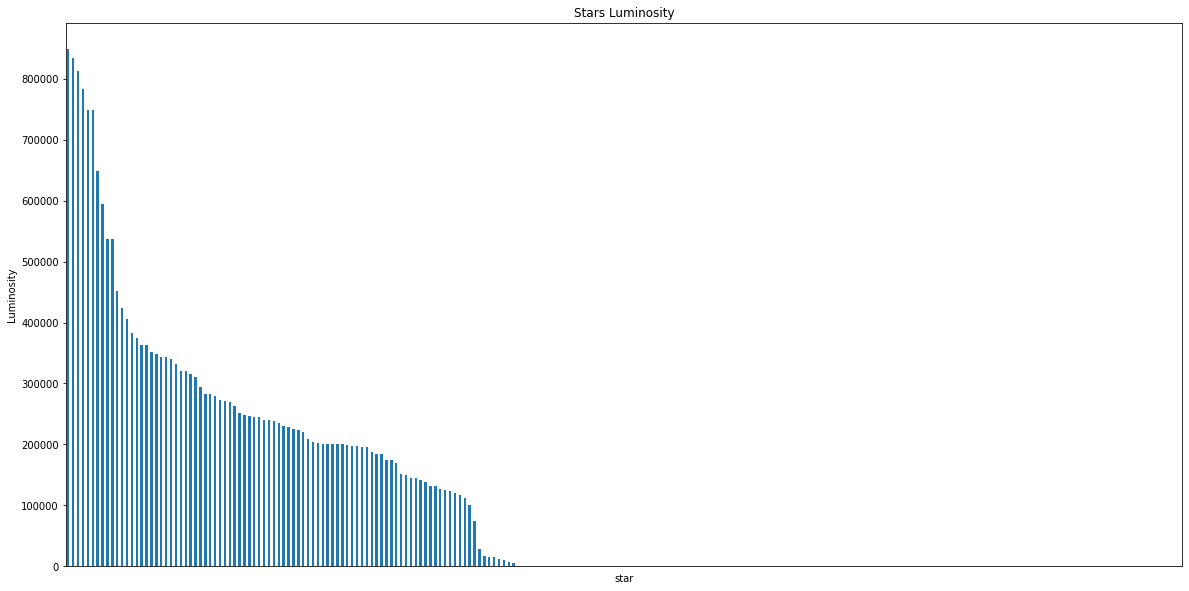

In [25]:
# plotting the stars Luminosity distribution

df_stars['Luminosity(L/Lo)'].sort_values(ascending=False).plot(kind='bar',figsize = (20,10))
plt.xlabel('star')
plt.ylabel('Luminosity')
plt.title('Stars Luminosity')

plt.xticks([])

([], [])

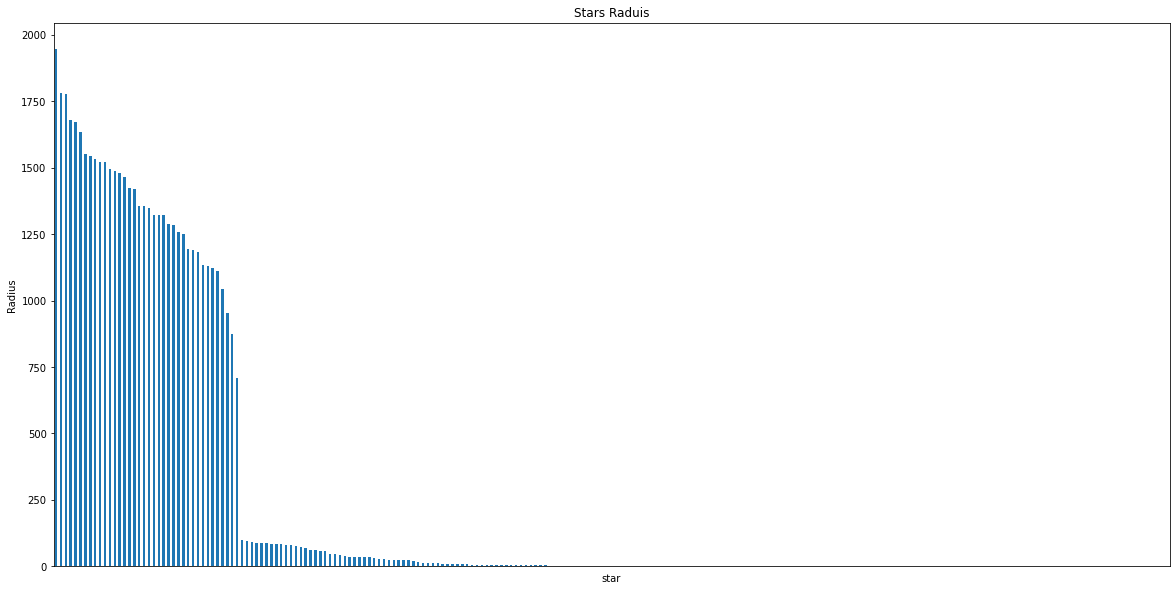

In [26]:
# plotting the stars radius distribution

df_stars['Radius(R/Ro)'].sort_values(ascending=False).plot(kind='bar',figsize = (20,10))
plt.xlabel('star')
plt.ylabel('Radius')
plt.title('Stars Raduis')
plt.xticks([])

**Conclusions**

1) During the analysis the incorrect color names were revealed and changed to correct.

2) Based on the information shown on histogram, the can conclude following:

- most part of stars color is red, blue and white-blue;
- more than a half of stars has temperature of 5000 K;
- 70 % of stars have radius below 250;
- 55% o stars has luminosity less then 40 000 units.

<a name ='section_4'></a>
# Data encoding 

In [20]:
# separation of categorical an dnumeric features

numeric_cols = df_stars.drop(columns = ['Star color','Star type']).columns
categorical_cols = ['Star color','Star type'] 

print('Numeric:',numeric_cols,'\n','\n', 'Categorical:',categorical_cols)

Numeric: Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)'],
      dtype='object') 
 
 Categorical: ['Star color', 'Star type']


In [21]:
# create a copy of df
df_stars_for_coding = df_stars.copy()

In [22]:
scaler = MinMaxScaler()

In [23]:
# numeric features encoding

scaler.fit(df_stars_for_coding[numeric_cols])
numeric_transformed = pd.DataFrame(scaler.transform(df_stars_for_coding[numeric_cols]),columns = [numeric_cols])

In [24]:
# display the result
numeric_transformed

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv)
0,0.029663,2.695957e-09,0.000083,0.876798
1,0.028980,4.591368e-10,0.000075,0.891807
2,0.017367,2.236820e-10,0.000048,0.957473
3,0.022622,1.059547e-10,0.000078,0.893371
4,0.000000,3.296367e-11,0.000049,1.000000
...,...,...,...,...
223,0.972150,4.412776e-01,0.695919,0.062226
224,0.759307,9.818959e-01,0.612777,0.040338
225,0.181025,6.327765e-01,0.730304,0.037211
226,0.191692,4.767253e-01,0.570694,0.021576


In [25]:
numeric_transformed.columns = df_stars.drop(columns = ['Star color','Star type']).columns

In [26]:
# categorical features encoding
ohe = OneHotEncoder()
categorical_transformed = ohe.fit_transform(df_stars_for_coding[categorical_cols]).toarray()

In [27]:
# encoded data to dataset
categorical_transformed = pd.DataFrame(categorical_transformed)

In [28]:
# display the results
categorical_transformed

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
223,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
224,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
225,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
226,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [29]:
# join the encoded data
df_stars_prepared = numeric_transformed.join(categorical_transformed)

In [30]:
# display the results 
df_stars_prepared

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),0,1,2,3,4,5,6,7,8,9,10
0,0.029663,2.695957e-09,0.000083,0.876798,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.028980,4.591368e-10,0.000075,0.891807,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.017367,2.236820e-10,0.000048,0.957473,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.022622,1.059547e-10,0.000078,0.893371,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,3.296367e-11,0.000049,1.000000,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223,0.972150,4.412776e-01,0.695919,0.062226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
224,0.759307,9.818959e-01,0.612777,0.040338,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
225,0.181025,6.327765e-01,0.730304,0.037211,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
226,0.191692,4.767253e-01,0.570694,0.021576,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [31]:
# selection of target 
df_stars_Y = df_stars_prepared['Temperature (K)']

In [32]:
# Selection of features
df_stars_X = df_stars_prepared.drop(columns = ['Temperature (K)'])

In [33]:
# split the data to train and test samples
X_train, X_test, y_train, y_test = train_test_split(df_stars_X, df_stars_Y, test_size=0.3, random_state=42)

In [34]:
# data transform to tensor
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)
y_train = torch.FloatTensor(y_train.values)
y_test = torch.FloatTensor(y_test.values)

<a name ='section_5'></a>
# Building Neural networks

## Building base Neural network

In [35]:
# function for calculation of RMSE plotting the hist of comparison actual and predicted temperature of stars

def plot_result (preds, y_test_):
    preds = preds.detach().numpy()
    y_test_ = y_test_.detach().numpy() 
    df = pd.DataFrame(preds, columns = ['prediction'])
    df['actual'] = y_test_
    for i in df.columns:
        df[i] = df[i] * df_stars['Temperature (K)'].max()
    df.plot(kind = 'bar',figsize=(20,10))
    plt.title('star temperature')
    plt.ylabel('temprature')
    plt.xticks([])
    print(df.head())
    print('\n','RMSE:',mean_squared_error(df['actual'],df['prediction'],squared = False))

In [36]:
# Net 1 building

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
net_1 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [37]:
# net 1 training and making a prediction

optimizer = torch.optim.Adam(net_1.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_1.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_1.eval(),
            test_preds_1 = net_1.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_1) == y_test).float().mean().data
            print(accuracy)

tensor(0.1294, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0775, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0485, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0294, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0226, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0195, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0176, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0166, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0163, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseL

     prediction        actual
0  25638.511719   9449.041992
1   1454.730591   1272.693848
2   1245.530518    799.768799
3  17902.568359  11718.031250
4   1319.206055   1472.373291

 RMSE: 4868.386


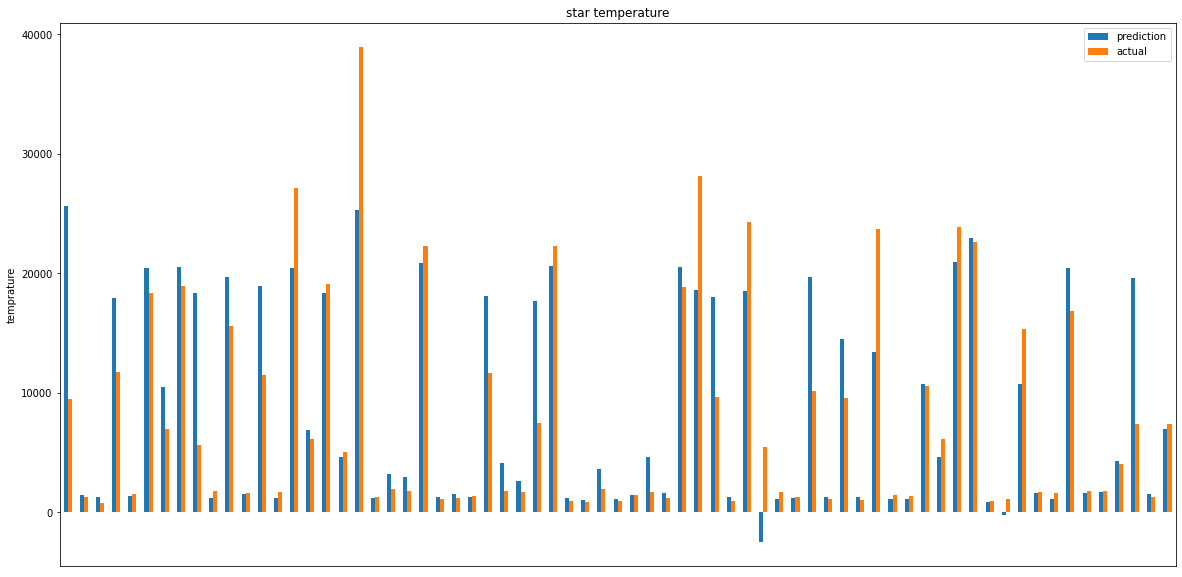

In [38]:
# net results
plot_result(test_preds_1,y_test)

**Conclusion on net_1**

RMSE of net_1 is quite good, the model to be used for the further optimization

## Building neural network with LeakyReLU activaton

In [39]:
# bulding net_2

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
net_2 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [40]:
# net_2 training and making a prediction

optimizer = torch.optim.Adam(net_2.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_2.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_2.eval(),
            test_preds_2 = net_2.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_2) == y_test).float().mean().data
            print(accuracy)

tensor(0.1117, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0811, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0615, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0446, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0314, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0250, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0218, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0194, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0172, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0154, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0142, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0135, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0131, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0122, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0120, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0118, grad_fn=<MseL

     prediction        actual
0  21669.697266   9449.041992
1   1492.615234   1272.693848
2   1537.019897    799.768799
3  14472.894531  11718.031250
4   1318.640869   1472.373291

 RMSE: 4356.7583


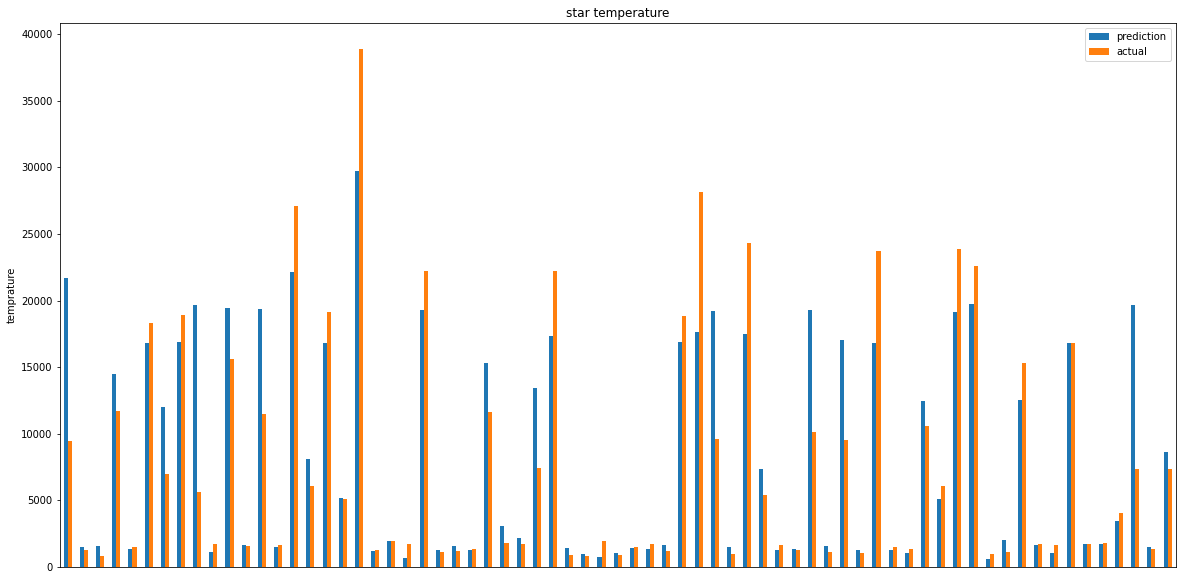

In [41]:
plot_result(test_preds_2,y_test)

**Conclusion on net_2**

Required RMSE on net_2 was achieved, model to be used for the further increase of result.

## Building neural network with Sigmoid activaton function

In [42]:
# building net_3

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1)
        self.act1 = nn.Sigmoid()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.act2 = nn.Sigmoid()
        self.fc3 = nn.Linear(hidden_size_2, output_size)
        self.act3 = nn.Sigmoid()
    
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 18
hidden_size_2 = 45
output_size = 1    
    
net_3 = NeuralNet(input_size, hidden_size_1, hidden_size_2,output_size)

In [43]:
# net_3 training and making a prediction

optimizer = torch.optim.Adam(net_3.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 600

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_2.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward() 
    optimizer.step()
    if (epoch % 100 == 0) or (epoch == 600) :
            net_3.eval(),
            test_preds_3 = net_3.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_3) == y_test).float().mean().data
            print(accuracy)

tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)
tensor(0.)


     prediction        actual
0  21032.304688   9449.041992
1  21063.041016   1272.693848
2  21090.667969    799.768799
3  21094.648438  11718.031250
4  21062.929688   1472.373291

 RMSE: 15818.15


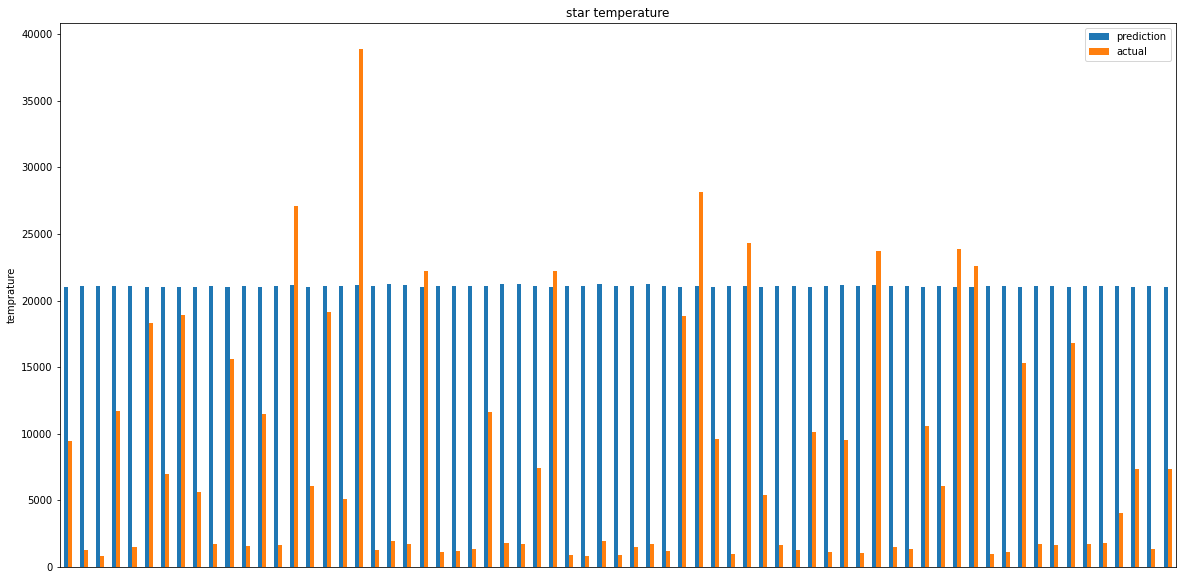

In [44]:
# display the results of net_3

plot_result(test_preds_3,y_test)

**Conclusion on net_3**

*sigmoid function predict the average value - such neural network not te be used for the increase of results*

<a name ='section_6'></a>
# Neural Networks tuning

**learning rate tuning**

In [45]:
# based on net 1 building net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [46]:
# net 4 training and making a prediction (changes are - lr +=0.01)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1294, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0166, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseL

     prediction        actual
0  24865.097656   9449.041992
1   1804.313721   1272.693848
2   2341.796387    799.768799
3  16544.482422  11718.031250
4    977.397095   1472.373291

 RMSE: 4803.809


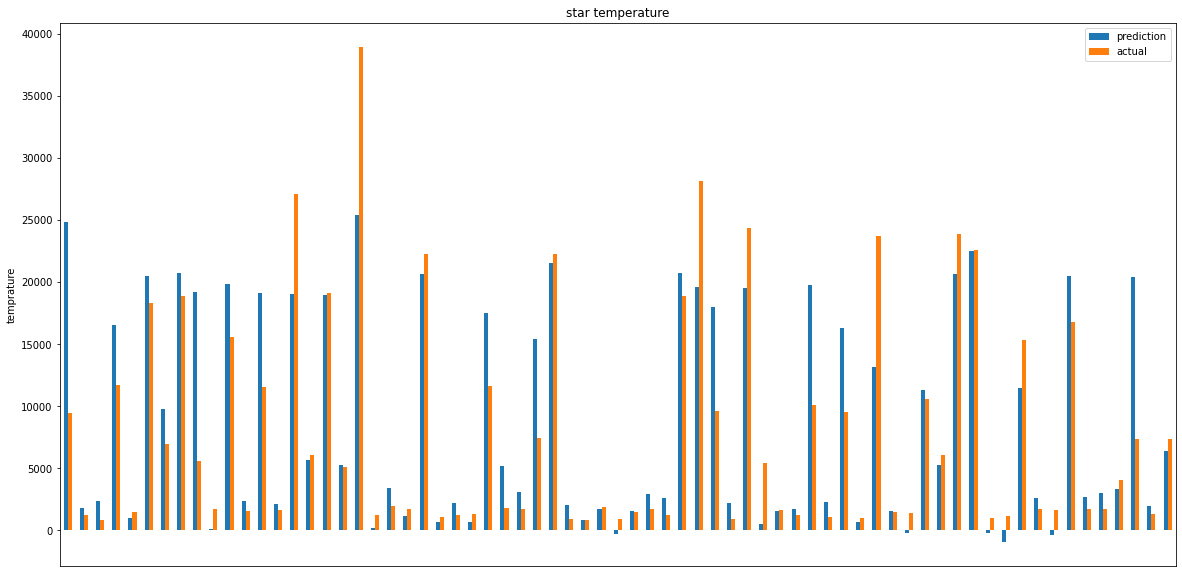

In [47]:
# display the results

plot_result(test_preds_4,y_test)

In [48]:
# based on net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [49]:
# net_5 training and making a prediction (changes are - lr +=0.001)

optimizer = torch.optim.Adam(net_5.parameters(),lr=0.002)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1117, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0628, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0349, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0232, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0193, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0167, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0150, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0142, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0136, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0132, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0123, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0118, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0111, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0107, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0103, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0100, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0098, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0097, grad_fn=<MseL

     prediction        actual
0  21693.945312   9449.041992
1     -8.832759   1272.693848
2    -15.238729    799.768799
3   9485.941406  11718.031250
4     -8.603992   1472.373291

 RMSE: 4400.8994


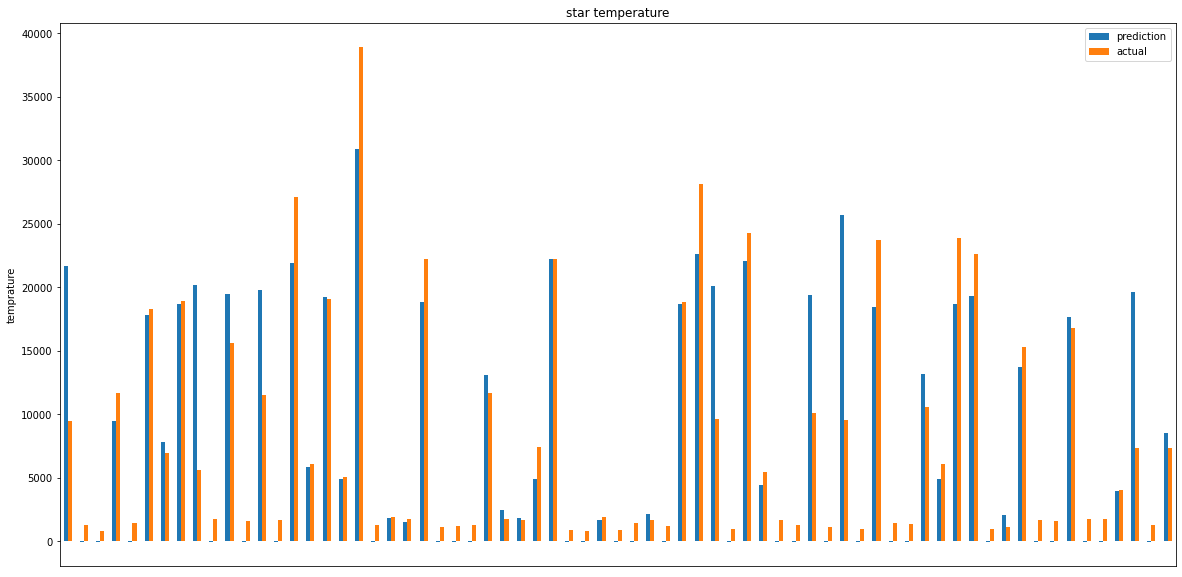

In [50]:
# display the results

plot_result(test_preds_5,y_test)

**Learning rate changes**

- Changes of learning rate has slightly increase the RMSE score of net 1 - changes are accepted and to be used for the further model optimization.
- Changes of learning rate has reduce the RMSE score of net 2 - changes rejected.

**Optimizer tuning**

In [52]:
# based on  optimized net 1 building the net_1

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [53]:
# traininf od net_4 (chnages - optimizer - SGD)

optimizer = torch.optim.SGD(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1294, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0986, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0893, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0840, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0798, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0763, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0731, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0702, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0674, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0648, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0622, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0596, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0570, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0545, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0519, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0494, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0469, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0444, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0420, grad_fn=<MseL

     prediction        actual
0  15725.837891   9449.041992
1   4302.927246   1272.693848
2   6401.625977    799.768799
3  15632.453125  11718.031250
4   4302.507324   1472.373291

 RMSE: 6321.381


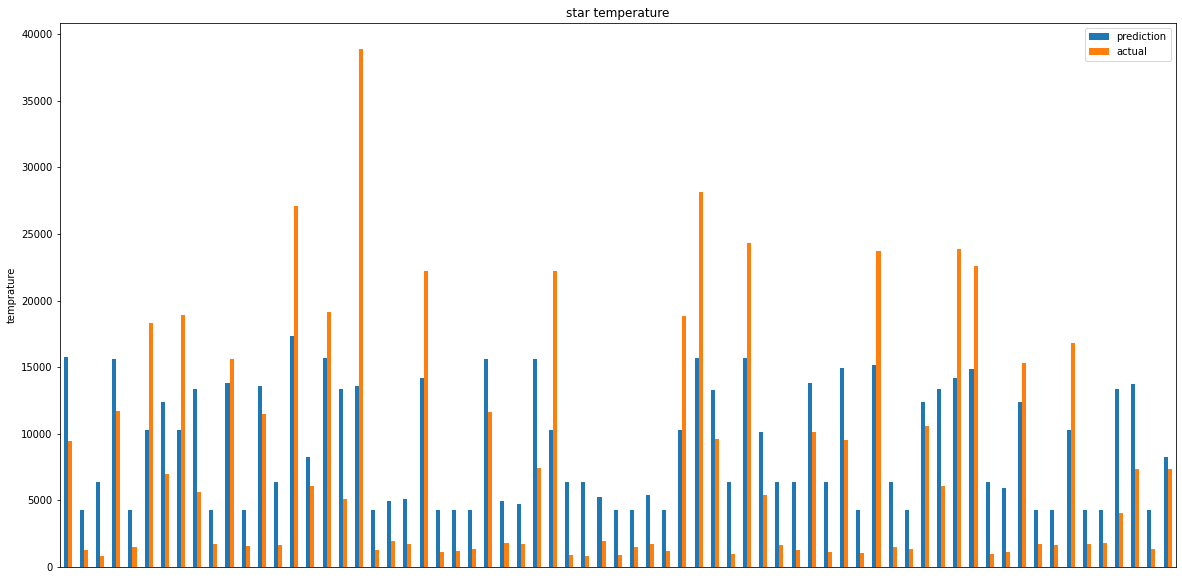

In [54]:
plot_result(test_preds_4,y_test)

In [55]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [56]:
# traininf of net_4 (changes - optimizer - RMSprop)

optimizer = torch.optim.RMSprop(net_4.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1294, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0239, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0180, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0165, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseL

     prediction        actual
0  25195.689453   9449.041992
1   1302.915405   1272.693848
2   1295.320801    799.768799
3  17401.923828  11718.031250
4    998.719788   1472.373291

 RMSE: 4810.8184


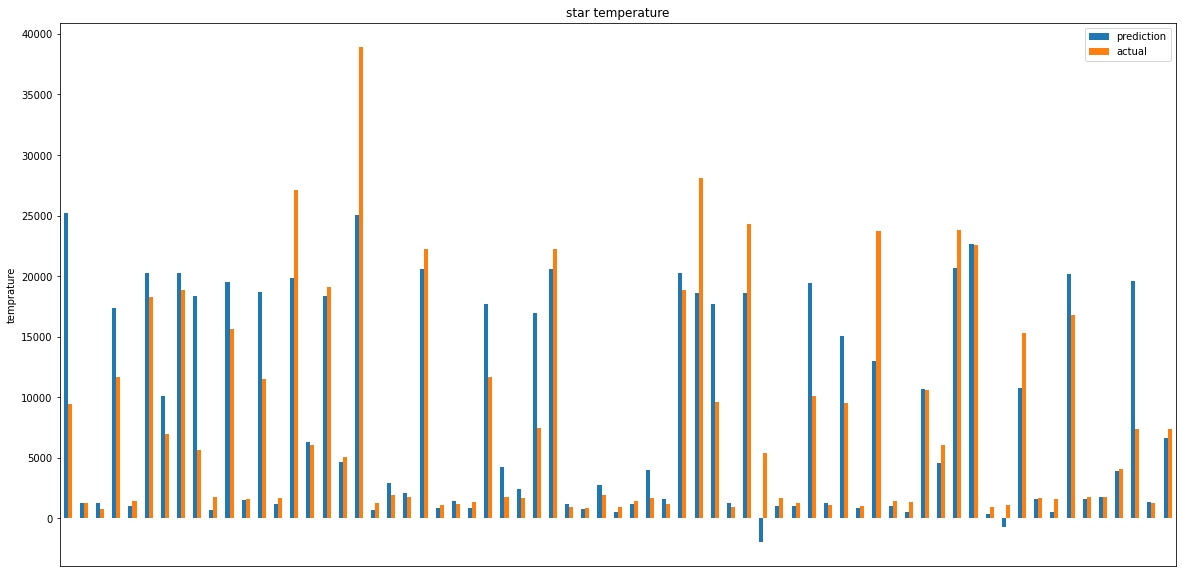

In [57]:
plot_result(test_preds_4,y_test)

In [58]:
# based on net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [59]:
# training net_5 (changes - optimizer - SGD)

optimizer = torch.optim.SGD(net_5.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1117, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.1076, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.1040, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.1008, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0980, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0955, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0933, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0914, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0897, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0882, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0869, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0857, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0846, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0837, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0829, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0822, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0815, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0809, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0804, grad_fn=<MseL

    prediction        actual
0  8418.826172   9449.041992
1  7992.934082   1272.693848
2  8766.971680    799.768799
3  6583.833496  11718.031250
4  8045.629395   1472.373291

 RMSE: 9329.265


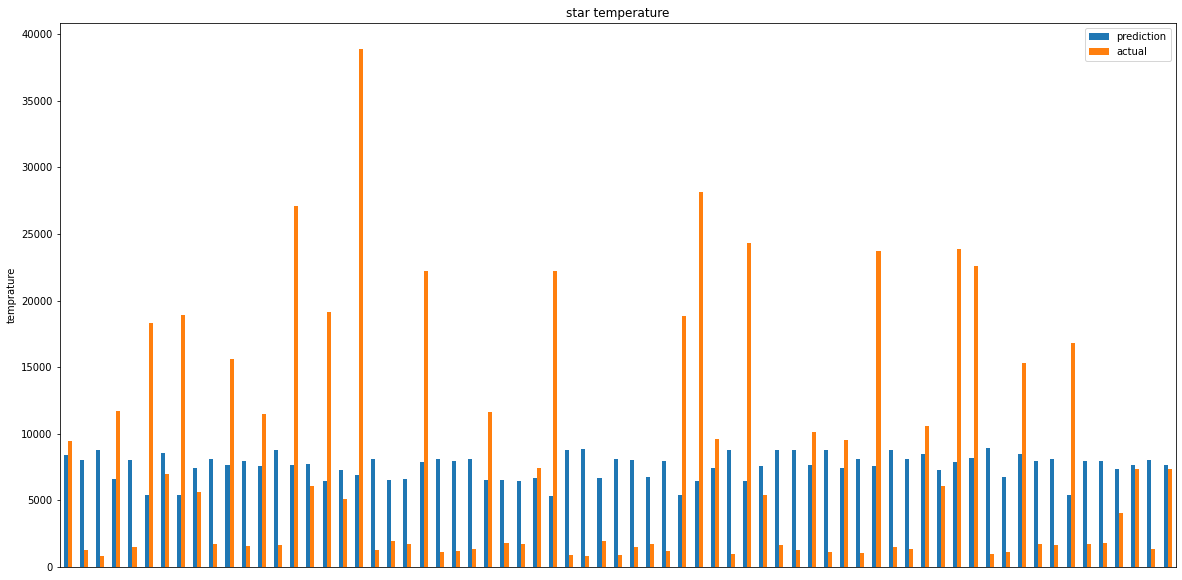

In [60]:
plot_result(test_preds_5,y_test)

In [61]:
# based on net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [62]:
# training net5 (changes - optimizer - RMSprop)

optimizer = torch.optim.RMSprop(net_5.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1117, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0342, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0228, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0181, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0141, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0132, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0129, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0127, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0125, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0122, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0121, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0120, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0118, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0117, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0115, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0114, grad_fn=<MseL

     prediction        actual
0  22199.255859   9449.041992
1   1284.554321   1272.693848
2   1227.034912    799.768799
3  13621.442383  11718.031250
4   1125.555298   1472.373291

 RMSE: 4377.1074


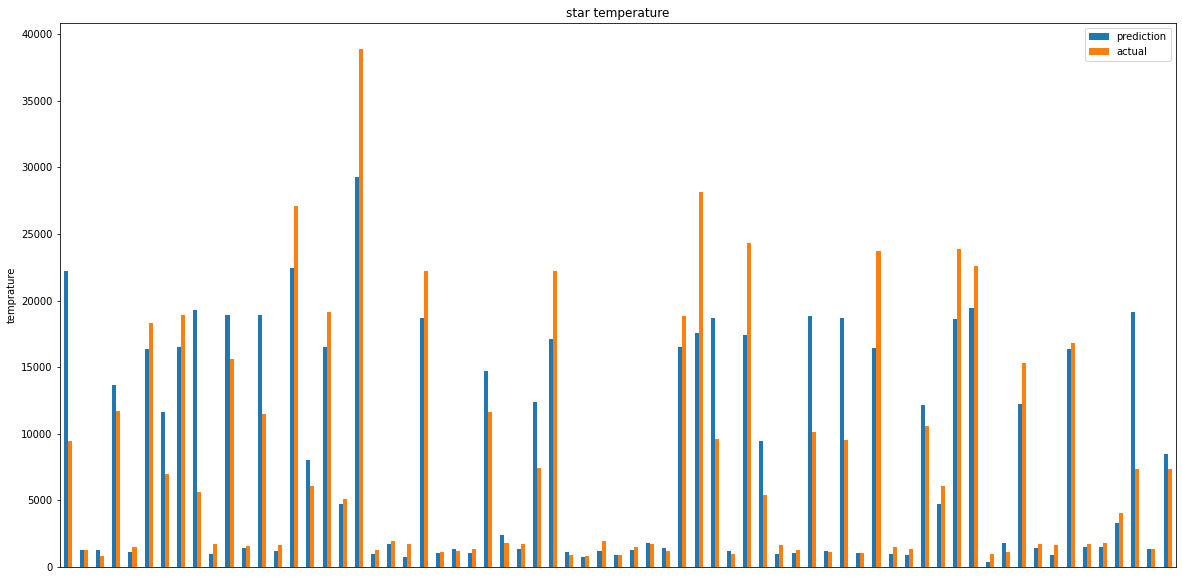

In [63]:
plot_result(test_preds_5,y_test)

**Conclusion on optimizer changes**

Changes of optimizer has not increase the RMSE score on both networks - adam optimizer will remain as the best for the networks and used for further optimization.

**Dropout tuning**

In [64]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
#         self.dp2 = nn.Dropout(p = 0.2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
#         self.dp3 = nn.Dropout(p = 0.2)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.fc2(x)
#         x = self.dp2(x)
        x = self.fc3(x)
#         x = self.dp3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [65]:
# training net_4 (changes - added dp1, p = 0.2)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1317, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0166, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseL

     prediction        actual
0  24865.228516   9449.041992
1   1804.252808   1272.693848
2   2341.591797    799.768799
3  16544.748047  11718.031250
4    977.463867   1472.373291

 RMSE: 4803.806


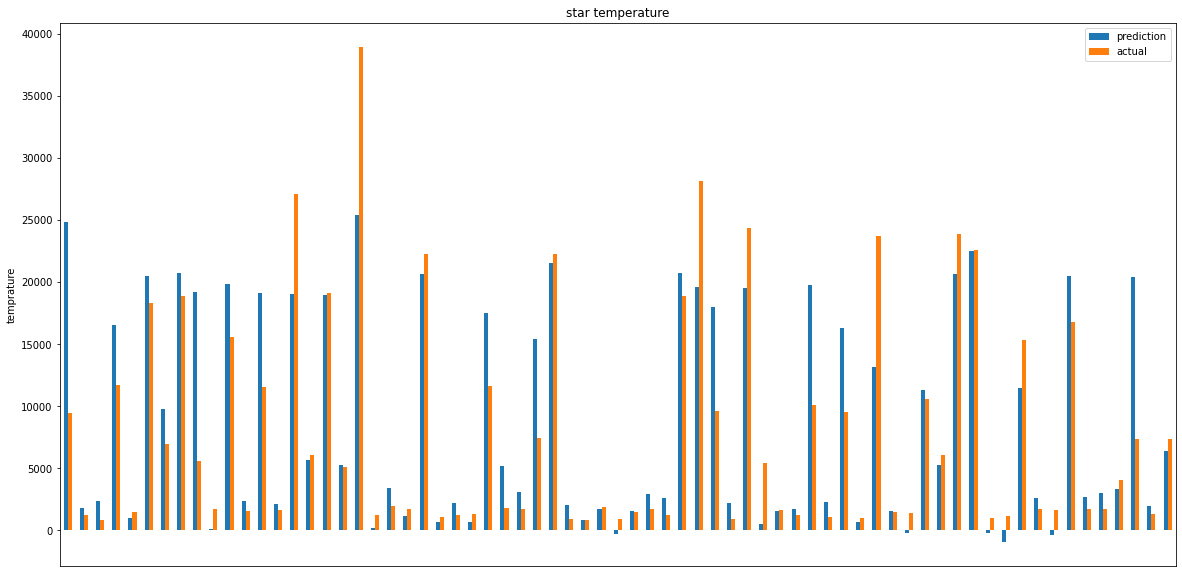

In [66]:
plot_result(test_preds_4,y_test)

In [67]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p = 0.5)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
#         self.dp3 = nn.Dropout(p = 0.2)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.fc3(x)
#         x = self.dp3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [68]:
# training net_4 (changes - added dp1, p = 0.2 и dp2, p = 0.5)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1405, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0170, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseL

     prediction        actual
0  24865.097656   9449.041992
1   1804.310059   1272.693848
2   2341.790039    799.768799
3  16544.482422  11718.031250
4    977.392517   1472.373291

 RMSE: 4803.809


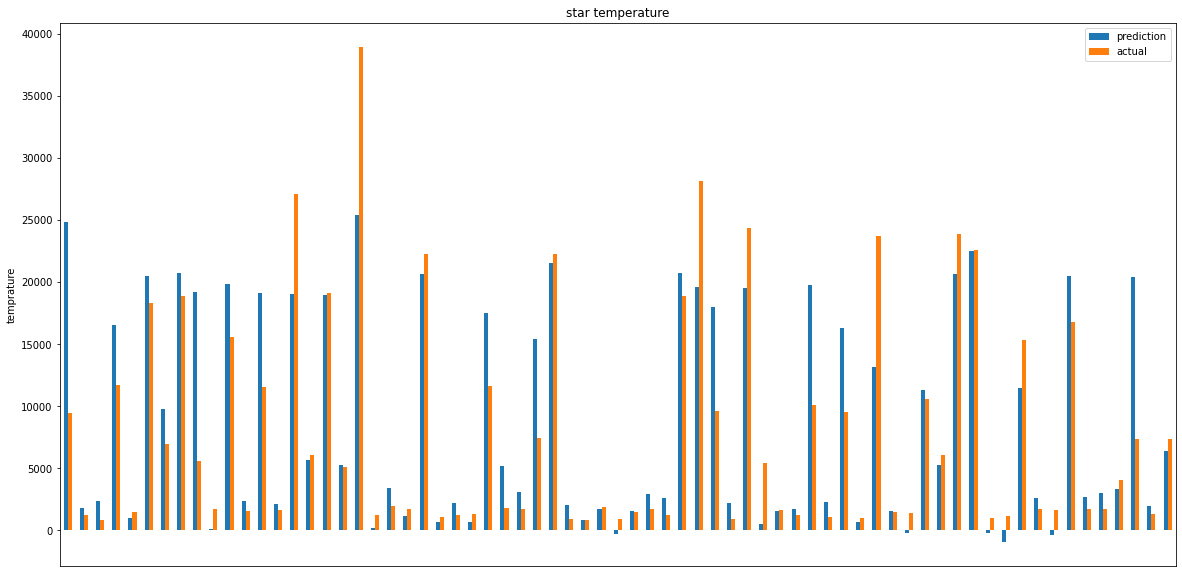

In [69]:
plot_result(test_preds_4,y_test)

In [70]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
#         self.dp2 = nn.Dropout(p = 0.2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
        self.dp3 = nn.Dropout(p = 0.5)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.fc2(x)
#         x = self.dp2(x)
        x = self.fc3(x)
        x = self.dp3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [71]:
# training net_4 (changes - added dp1  и dp3, p = 0.5)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1319, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0167, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseL

     prediction        actual
0  24864.966797   9449.041992
1   1804.372925   1272.693848
2   2341.990723    799.768799
3  16544.232422  11718.031250
4    977.327820   1472.373291

 RMSE: 4803.8115


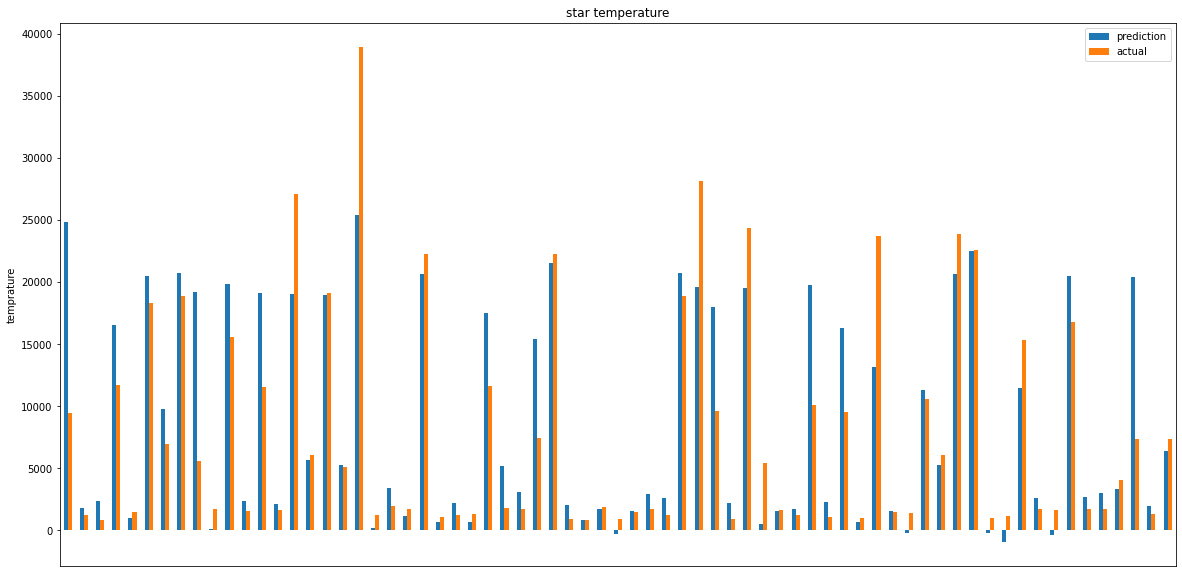

In [72]:
plot_result(test_preds_4,y_test)

In [73]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p = 0.5)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
        self.dp3 = nn.Dropout(p = 0.2)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.fc3(x)
        x = self.dp3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [74]:
# training net_4 (changes - added  dp1, dp2  и dp3, p = 0.2, 0.5, 0.2)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.1473, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0180, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseL

     prediction        actual
0  24865.683594   9449.041992
1   1804.027466   1272.693848
2   2340.869141    799.768799
3  16545.644531  11718.031250
4    977.693787   1472.373291

 RMSE: 4803.796


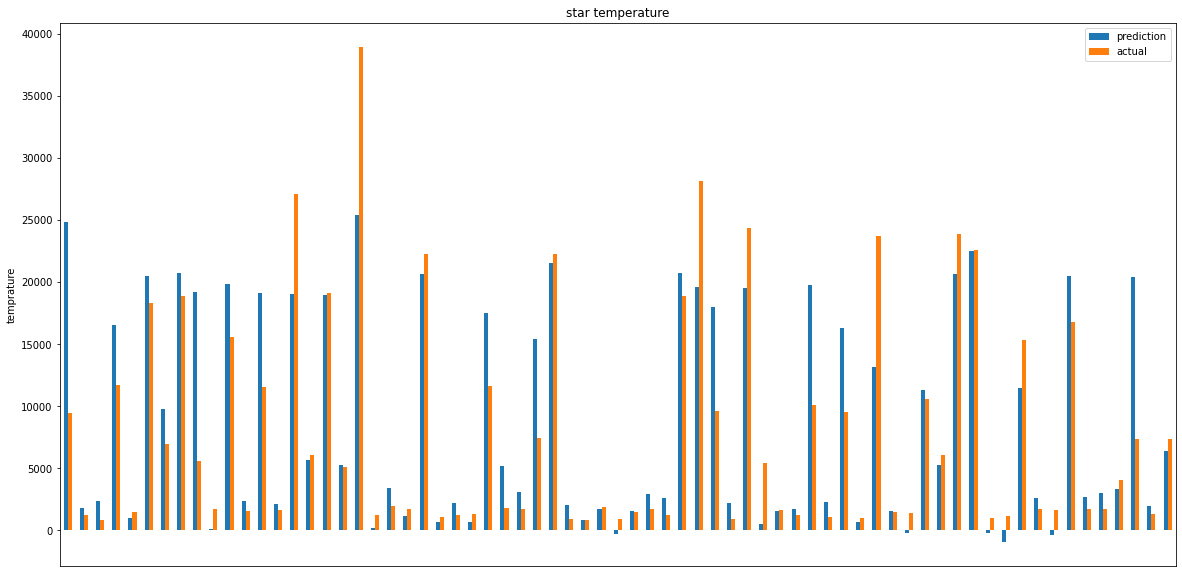

In [75]:
plot_result(test_preds_4,y_test)

**Conclusion on dropout for net_4**

Score increase obtained only in case of apply dp1 = 0.2

Other settings has not increase the RMS score for the net 4

In [76]:
# based on optimized net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.1)
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
#         self.dp2 = nn.Dropout(p = 0.2)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
#         self.dp3 = nn.Dropout(p = 0.2)
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)
        x = self.fc2(x)
#         x = self.dp2(x)
        x = self.act2(x)
        x = self.fc3(x)
#         x = self.dp3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [77]:
# training net_5 (changes - added dp1, p = 0.1)

optimizer = torch.optim.Adam(net_5.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1119, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0810, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0614, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0445, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0313, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0251, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0220, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0197, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0179, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0163, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0149, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0141, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0135, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0131, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0122, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0119, grad_fn=<MseL

     prediction        actual
0  21826.535156   9449.041992
1   1492.371826   1272.693848
2   1367.966187    799.768799
3  14648.825195  11718.031250
4   1352.701904   1472.373291

 RMSE: 4337.173


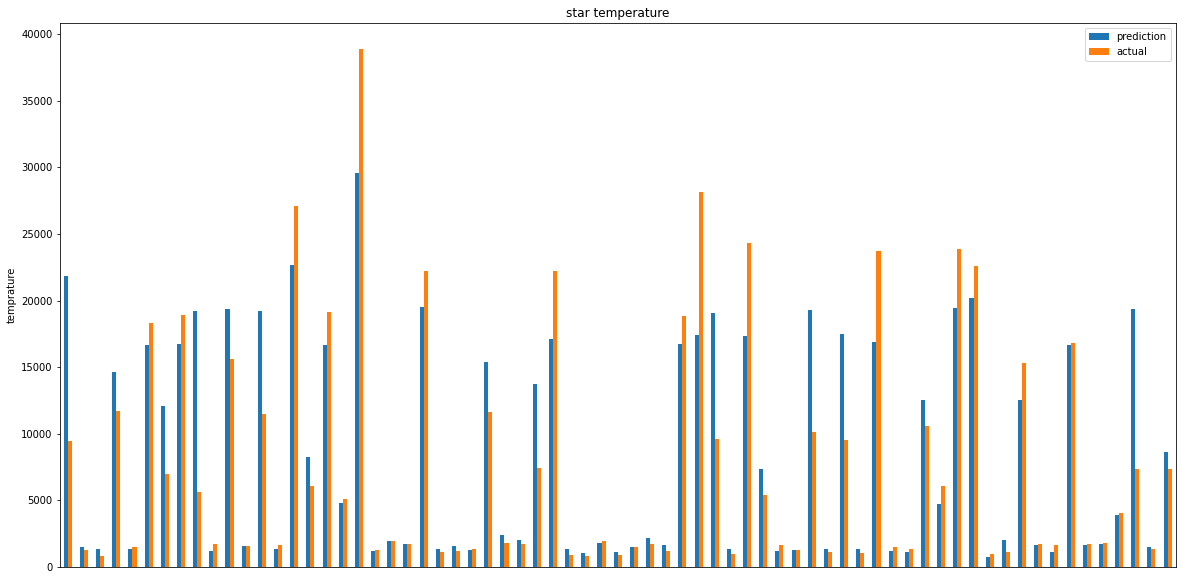

In [78]:
plot_result(test_preds_5,y_test)

In [79]:
# based on optimized net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.1)
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p = 0.1)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
#         self.dp3 = nn.Dropout(p = 0.2)
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.act2(x)
        x = self.fc3(x)
#         x = self.dp3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [80]:
# training net_5 (changes - added dp1, p = 0.1 , dp2, p=0.1)

optimizer = torch.optim.Adam(net_5.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1130, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0809, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0614, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0444, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0313, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0250, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0219, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0196, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0178, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0149, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0140, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0135, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0131, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0121, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0119, grad_fn=<MseL

     prediction        actual
0  21789.283203   9449.041992
1   1470.095215   1272.693848
2   1351.251099    799.768799
3  14539.531250  11718.031250
4   1329.332153   1472.373291

 RMSE: 4318.3047


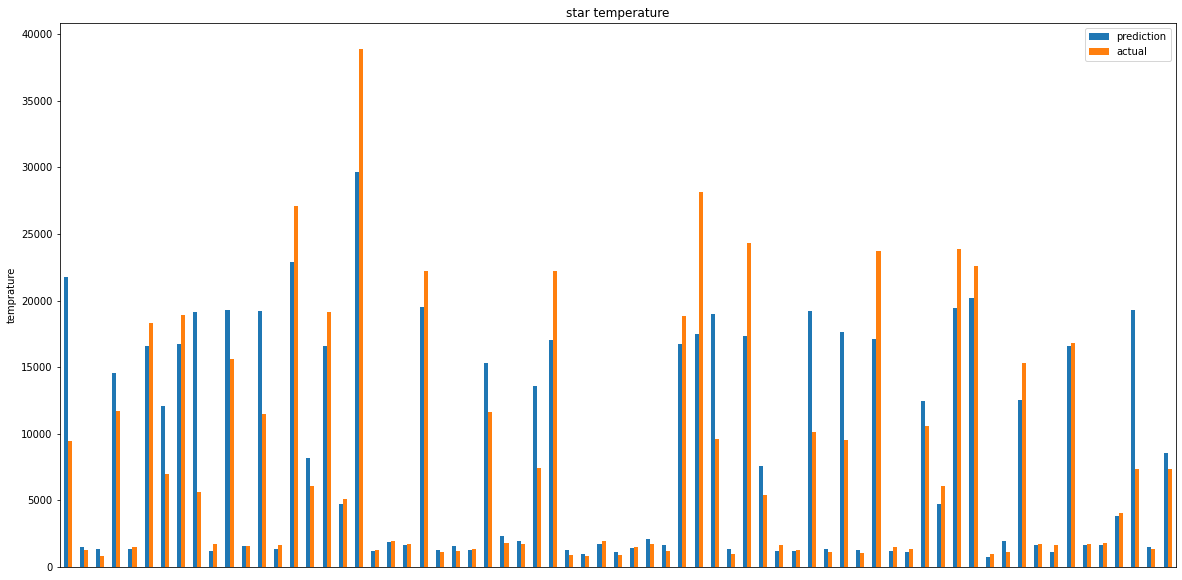

In [81]:
plot_result(test_preds_5,y_test)

In [82]:
# based on optimized net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.1)
        self.act1 = nn.LeakyReLU()
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p = 0.05)
        self.act2 = nn.LeakyReLU()
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
        self.dp3 = nn.Dropout(p = 0.05)
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.act2(x)
        x = self.fc3(x)
        x = self.dp3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [83]:
# training net_5 (changes - added  dp1, p = 0.1 , dp2, p=0.05, dp3 = 0.05)

optimizer = torch.optim.Adam(net_5.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0809, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0614, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0445, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0313, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0251, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0219, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0196, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0178, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0162, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0148, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0140, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0135, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0131, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0128, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0122, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0119, grad_fn=<MseL

     prediction        actual
0  21795.246094   9449.041992
1   1478.717285   1272.693848
2   1351.359741    799.768799
3  14566.385742  11718.031250
4   1346.858398   1472.373291

 RMSE: 4328.24


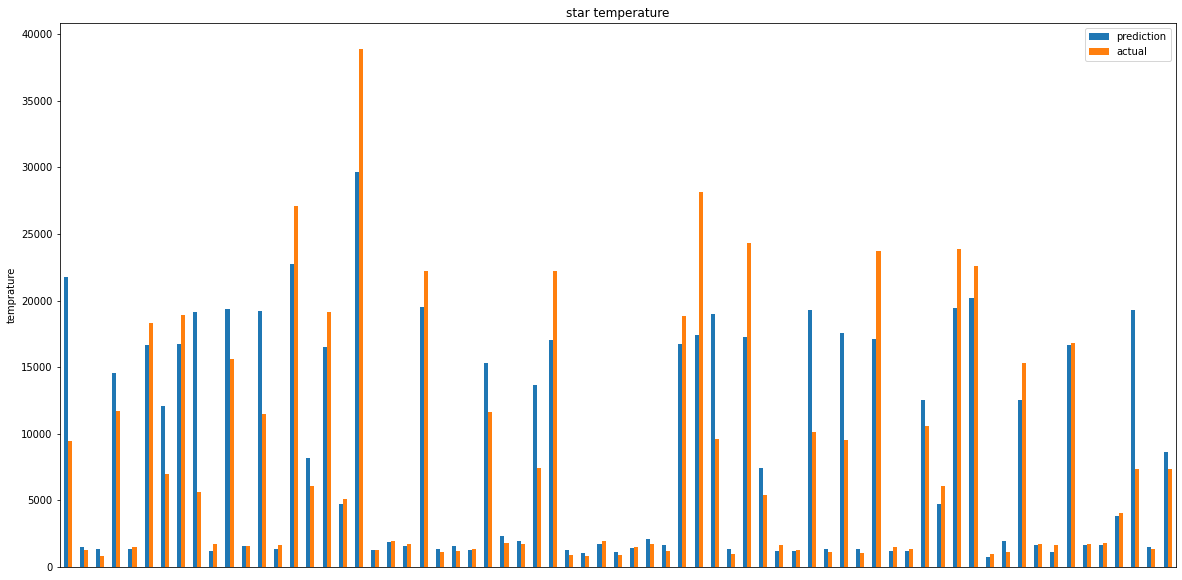

In [84]:
plot_result(test_preds_5,y_test)

**Conclusion on dropout tuning on net_5**

Best score achieved adding the following layers:
- dp1 p = 0.1 
- dp2 p = 0.05
- dp3 p = 0.05

The changes to be used for further network optimization

**BatchNorm Tuning**

In [85]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.2)
        self.bn1 = nn.BatchNorm1d(hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.fc3 = nn.Linear(hidden_size_2, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.fc3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [86]:
# training net_4 (changes - added bn1)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.3048, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0194, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0164, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0156, grad_fn=<MseL

     prediction        actual
0  25039.654297   9449.041992
1   1715.798096   1272.693848
2   2056.192139    799.768799
3  16910.980469  11718.031250
4   1071.918335   1472.373291

 RMSE: 4807.141


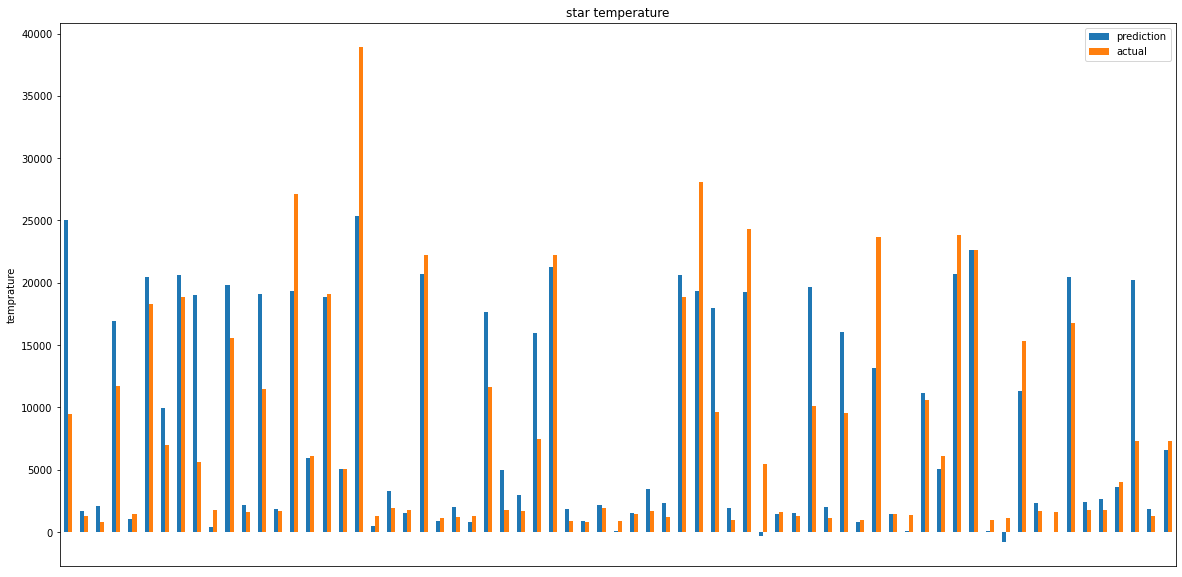

In [87]:
plot_result(test_preds_4,y_test)

In [88]:
# based on optimized net 1 building the net_4

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.2)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.bn2 = nn.BatchNorm1d(hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.fc2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        return x
    
net_4 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [89]:
# training net_4 (changes - added bn2)

optimizer = torch.optim.Adam(net_4.parameters(),lr=0.011)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_4.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_4.eval(),
            test_preds_4 = net_4.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_4) == y_test).float().mean().data
            print(accuracy)

tensor(0.5774, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0244, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0165, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0161, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0160, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0159, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0158, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0157, grad_fn=<MseL

     prediction        actual
0  25218.388672   9449.041992
1   1640.124023   1272.693848
2   1796.611572    799.768799
3  17222.617188  11718.031250
4   1156.061279   1472.373291

 RMSE: 4819.2676


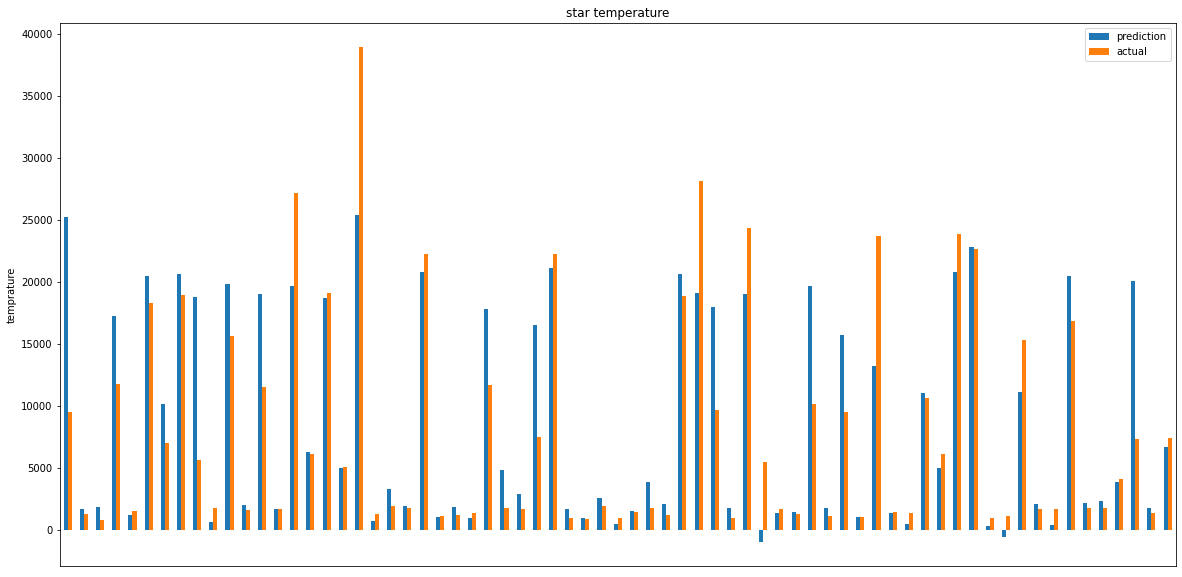

In [90]:
plot_result(test_preds_4,y_test)

**Conclusion on using of Batchnorm on net_4**

Best score network has achieved with applied bn2.

In [91]:
# based on optimized net 2 building the net_5

torch.manual_seed(1234)
input_size = 14
hidden_size_1 = 12
hidden_size_2 = 8
output_size = 1

class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size_1) 
        self.dp1 = nn.Dropout(p = 0.1)
        self.act1 = nn.LeakyReLU()
        self.bn1 = nn.BatchNorm1d(hidden_size_1)
        self.fc2 = nn.Linear(hidden_size_1, hidden_size_2) 
        self.dp2 = nn.Dropout(p = 0.05)
        self.act2 = nn.LeakyReLU()
        self.bn2 = nn.BatchNorm1d(hidden_size_2)
        self.fc3 = nn.Linear(hidden_size_2, output_size)  
        self.dp3 = nn.Dropout(p = 0.05)
        self.act3 = nn.LeakyReLU()
    
    def forward(self, x):
        x = self.fc1(x)
        x = self.dp1(x)
        x = self.act1(x)
        x = self.bn1(x)
        x = self.fc2(x)
        x = self.dp2(x)
        x = self.act2(x)
        x = self.bn2(x)
        x = self.fc3(x)
        x = self.dp3(x)
        x = self.act3(x)
        return x
    
net_5 = NeuralNet(input_size, hidden_size_1, hidden_size_2, output_size)

In [92]:
# training net_5 (changes - added bn1 и bn2)

optimizer = torch.optim.RMSprop(net_5.parameters(),lr=0.001)

loss = torch.nn.MSELoss()

num_epochs = 500

for epoch in range(num_epochs):
    optimizer.zero_grad()
    preds = net_5.forward(X_train).flatten()
    loss_value = loss(preds,y_train)
    loss_value.backward()
    optimizer.step()
    if (epoch % 25 == 0) or (epoch == 500) :
            print(loss_value)
            net_5.eval(),
            test_preds_5 = net_5.forward(X_test).flatten()
            accuracy = (torch.round(test_preds_5) == y_test).float().mean().data
            print(accuracy)

tensor(0.1984, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0548, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0319, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0224, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0192, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0170, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0155, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0145, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0139, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0135, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0132, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0129, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0127, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0126, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0124, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0123, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0121, grad_fn=<MseLossBackward0>)
tensor(0.)
tensor(0.0121, grad_fn=<MseL

     prediction        actual
0  21879.076172   9449.041992
1   1796.710449   1272.693848
2   1542.364990    799.768799
3  15064.061523  11718.031250
4   1692.044678   1472.373291

 RMSE: 4300.2734


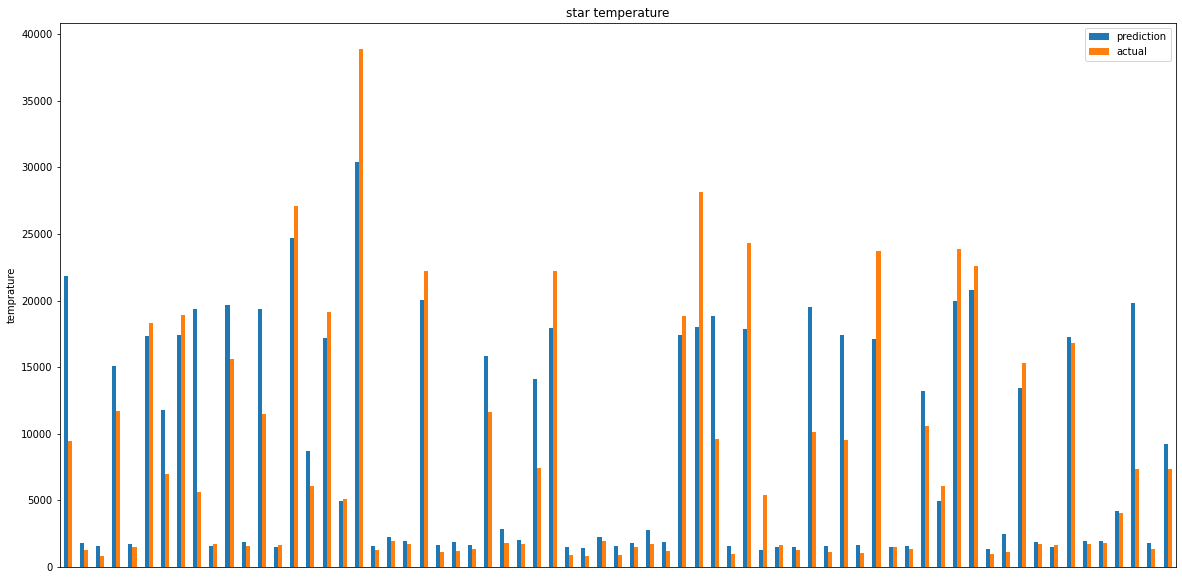

In [93]:
plot_result(test_preds_5,y_test)

**Conclusion on application of Batchnorm on network_5**

Using Batchnorm on first and second layers model has slightly increase score.

<a name ='section_7'></a>
# General Conclusion

**Creation of table with neural networks and it's scores**

In [94]:
table = []
for i in range(5):
    table.append('net_' + str(i+1))

print(table)

['net_1', 'net_2', 'net_3', 'net_4', 'net_5']


In [95]:
preds_nets = [test_preds_1,test_preds_2,test_preds_3,test_preds_4,test_preds_5]

In [96]:
for i in range(len(preds_nets)): 
    preds_nets[i] = preds_nets[i].detach().numpy()

In [97]:
rmse_nets = []
for i in preds_nets:
    rmse_nets.append(mean_squared_error(y_test.detach().numpy() * df_stars['Temperature (K)'].max() ,i,squared = False))

In [98]:
df_result = pd.DataFrame(table,columns = ['net_name'])

In [99]:
df_result['prediction'] = preds_nets

In [100]:
df_result['rmse'] = rmse_nets

**During the project execution the data was imported, prepared and analyzed.**

Five neural networks wer builded with following scores:

In [101]:
df_result.sort_values(by = 'rmse',ascending = False)

,net_name,prediction,rmse
0,net_1,"[25638.512, 1454.7306, 1245.5305, 17902.568, 1...",4868.386230
1,net_2,"[21669.697, 1492.6152, 1537.0199, 14472.895, 1...",4356.758301
2,net_3,"[21032.305, 21063.041, 21090.668, 21094.648, 2...",15818.150391
3,net_4,"[25218.389, 1640.124, 1796.6116, 17222.617, 11...",4819.267578
4,net_5,"[21879.076, 1796.7104, 1542.365, 15064.062, 16...",4300.273438


Best score of neural network:

In [102]:
df_result[df_result['rmse'] == df_result['rmse'].min()]

,net_name,prediction,rmse
4,net_5,"[21879.076, 1796.7104, 1542.365, 15064.062, 16...",4300.273438


**Best scores was achieved in neural network No 5 with following parameters:**

- lr =0.01
- num_epochs = 500
- optimizer RMS PROP
- activation function - nn.LeakyReLU()
- Dropout(p = 0.1) on first layer and p = 0.05 second and third layers;
- batchnorm - on first and second layers.

**RMSE less than 4500 successfully achieved!**